In [2]:
import importlib
import utils
importlib.reload(utils)
from utils import *
from sklearn.model_selection import train_test_split

In [3]:
conso_tou = pd.read_csv("conso_heat_perif_toulouse")
conso_zur = pd.read_csv("conso_heat_perif_zurich")
conso_sev = pd.read_csv("conso_cool_perif_seville")
occ=pd.read_csv("Occupancy_per_hour",delimiter="\t")

In [4]:
occ=pd.read_csv("Meteo_Perif_Toulouse_Contemporain/Agen/Meteo_input",delimiter="\t")

In [5]:
occ

,TIME,Temperature_ext_C,Sky_Temperature,Relative_Humidity,Wind_velocity,Solar_zenith_angle,Solar_Azimut_angle,Total_titled_surf_radiati,Beam_radiation,Angle_of_incid_4_surf,Ground_reflectance,Unnamed: 11
0,1.0,10.40,5.972487,92.0,1.40,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
1,2.0,10.45,5.930020,89.5,1.20,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
2,3.0,10.40,5.745373,86.0,0.85,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
3,4.0,10.25,5.506509,85.0,0.90,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
4,5.0,10.20,5.370907,84.5,1.05,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756.0,7.60,2.797175,96.5,2.35,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
8756,8757.0,7.00,2.215247,98.5,1.40,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
8757,8758.0,6.40,1.607324,99.5,0.65,90.0,-90.0,0.0,0.0,90.0,0.2,NaN
8758,8759.0,5.75,0.908714,99.5,0.15,90.0,-90.0,0.0,0.0,90.0,0.2,NaN


In [6]:
files = {
    "agen": "Meteo_Perif_Toulouse_Contemporain/Agen/Simulation_Outputs",
    "albi": "Meteo_Perif_Toulouse_Contemporain/Albi/Simulation_Outputs",
    "auch": "Meteo_Perif_Toulouse_Contemporain/Auch/Simulation_Outputs",
    "toulouse": "Meteo_Perif_Toulouse_Contemporain/Toulouse/Simulation_Outputs",
    "Birmensdorf":"Meteo_Perif_Zurich_Contemporain/Birmensdorf/Simulation_Outputs",
    "Taenikon":"Meteo_Perif_Zurich_Contemporain/Taenikon/Simulation_Outputs",
    "Zurich_fluntern":"Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Simulation_Outputs",
    "Zurich_kloten":"Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Simulation_Outputs"
}

files2 = {
    "Cordoba": "Meteo_Perif_Seville_Contemporain/Cordoba/Simulation_Outputs",
    "Granada": "Meteo_Perif_Seville_Contemporain/Granada/Simulation_Outputs",
    "Malaga": "Meteo_Perif_Seville_Contemporain/Malaga/Simulation_Outputs",
    "Sevilla": "Meteo_Perif_Seville_Contemporain/Sevilla/Simulation_Outputs"   
}

files3 = {
    "agen": "Meteo_Perif_Toulouse_Contemporain/Agen/Meteo_input",
    "albi": "Meteo_Perif_Toulouse_Contemporain/Albi/Meteo_input",
    "auch": "Meteo_Perif_Toulouse_Contemporain/Auch/Meteo_input",
    "toulouse": "Meteo_Perif_Toulouse_Contemporain/Toulouse/Meteo_input"
}

In [7]:
for city, path in files.items():
      globals()[f"Text_{city}"] = extract_columns(files[city],1)

for city2, path2 in files2.items():
      globals()[f"Text_{city2}"] = extract_columns(files2[city2],1)    

for city3, path3 in files3.items():
      globals()[f"hum_{city3}"] = extract_columns(files3[city3],3)  

occupation=extract_columns("Occupancy_per_hour",1)  

In [8]:
hum_agen

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,92.0,89.5,86.0,85.0,84.5,84.5,84.5,83.5,83.5,83.5,...,66.0,69.5,73.5,76.0,82.0,88.5,90.0,90.0,90.0,90.0
1,88.5,87.0,87.5,89.0,90.5,91.0,91.0,91.0,91.0,92.5,...,84.0,86.0,88.0,91.0,91.5,92.5,97.0,99.0,98.5,98.5
2,99.0,99.0,98.5,98.0,98.0,98.5,99.0,99.0,99.0,99.0,...,86.0,83.0,81.5,83.5,86.5,88.0,89.5,94.5,97.5,98.0
3,98.0,97.5,97.5,97.5,98.5,99.0,99.0,99.0,99.0,99.0,...,82.0,80.0,79.0,81.0,87.0,90.0,91.5,93.0,93.0,95.0
4,95.5,94.0,94.5,94.5,94.0,95.5,96.0,94.5,94.5,92.0,...,67.5,66.5,68.0,70.5,72.5,74.0,77.0,79.5,80.5,82.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,86.5,91.0,91.0,92.0,93.5,96.0,98.5,99.0,99.0,98.5,...,86.5,91.0,93.5,94.5,94.5,92.0,91.5,92.0,94.0,95.0
361,93.5,93.0,92.5,91.5,92.5,93.5,92.0,92.5,95.5,96.5,...,92.5,91.5,91.0,92.0,93.5,94.0,92.5,91.5,92.5,91.5
362,91.5,91.5,89.5,89.5,89.5,90.0,92.0,93.0,93.5,92.5,...,88.5,89.5,93.0,96.5,98.0,98.0,98.0,98.5,98.5,98.5
363,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,95.5,...,79.0,80.0,80.0,83.0,88.0,91.0,93.5,93.5,92.5,93.5


In [9]:
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)
Text_combined_zur = pd.concat([Text_Birmensdorf,Text_Taenikon,Text_Zurich_fluntern,Text_Zurich_kloten], axis=0).reset_index(drop=True)
Text_combined_sev = pd.concat([Text_Cordoba, Text_Granada,Text_Malaga,Text_Sevilla], axis=0).reset_index(drop=True)
Text_combined_tou['clusters'] = conso_tou['clusters']
Text_combined_tou['heat_on'] = conso_tou['heat_on']
Text_combined_zur['clusters'] = conso_zur['clusters']
Text_combined_zur['heat_on'] = conso_zur['heat_on']
Text_combined_sev['clusters'] = conso_sev['clusters']
Text_combined_sev['cool_on'] = conso_sev['cool_on']
Text_combined_tou.columns = Text_combined_tou.columns.astype(str)
Text_combined_zur.columns = Text_combined_zur.columns.astype(str)
Text_combined_sev.columns = Text_combined_sev.columns.astype(str)


Text_occ_agen = pd.concat([Text_agen,occupation],axis=1).reset_index(drop=True)
Text_occ_albi = pd.concat([Text_albi,occupation],axis=1).reset_index(drop=True)
Text_occ_auch = pd.concat([Text_auch,occupation],axis=1).reset_index(drop=True)
Text_occ_toulouse = pd.concat([Text_toulouse,occupation],axis=1).reset_index(drop=True)
Text_occ_combined_tou = pd.concat([Text_occ_agen, Text_occ_albi,Text_occ_auch,Text_occ_toulouse], axis=0).reset_index(drop=True)
Text_occ_combined_tou['clusters'] = conso_tou['clusters']
Text_occ_combined_tou['heat_on'] = conso_tou['heat_on']
Text_occ_combined_tou.columns = Text_occ_combined_tou.columns.astype(str)


Hum_combined_tou = pd.concat([hum_agen, hum_albi,hum_auch,hum_toulouse], axis=0).reset_index(drop=True)
Hum_combined_tou['clusters'] = conso_tou['clusters']
Hum_combined_tou['heat_on'] = conso_tou['heat_on']
Hum_combined_tou.columns = Hum_combined_tou.columns.astype(str)

Text = pd.concat([Text_Birmensdorf,Text_Taenikon,Text_Zurich_fluntern,Text_Zurich_kloten], axis=0).reset_index(drop=True)
Text['clusters'] = conso_sev['clusters']
Text.columns = Text.columns.astype(str)




In [10]:
Hum_combined_tou

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,clusters,heat_on
0,92.0,89.5,86.0,85.0,84.5,84.5,84.5,83.5,83.5,83.5,...,73.5,76.0,82.0,88.5,90.0,90.0,90.0,90.0,2.0,1
1,88.5,87.0,87.5,89.0,90.5,91.0,91.0,91.0,91.0,92.5,...,88.0,91.0,91.5,92.5,97.0,99.0,98.5,98.5,2.0,1
2,99.0,99.0,98.5,98.0,98.0,98.5,99.0,99.0,99.0,99.0,...,81.5,83.5,86.5,88.0,89.5,94.5,97.5,98.0,2.0,1
3,98.0,97.5,97.5,97.5,98.5,99.0,99.0,99.0,99.0,99.0,...,79.0,81.0,87.0,90.0,91.5,93.0,93.0,95.0,1.0,1
4,95.5,94.0,94.5,94.5,94.0,95.5,96.0,94.5,94.5,92.0,...,68.0,70.5,72.5,74.0,77.0,79.5,80.5,82.5,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83.5,82.0,84.0,84.0,84.0,84.5,82.0,80.0,83.0,81.5,...,68.5,71.5,73.5,74.5,76.0,76.5,73.5,73.0,1.0,1
1456,78.0,81.5,83.0,84.5,85.5,87.0,89.5,89.5,89.0,88.5,...,62.5,67.0,70.5,72.5,75.5,78.0,80.5,80.0,1.0,1
1457,79.5,84.0,90.5,93.5,93.0,94.0,96.5,97.0,98.0,98.0,...,72.0,74.5,78.5,83.0,86.5,85.0,83.0,85.5,2.0,1
1458,87.0,87.0,87.0,86.0,83.5,83.5,85.0,84.5,85.0,85.0,...,60.5,70.0,82.0,84.0,84.0,86.0,84.0,82.5,2.0,1


In [11]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


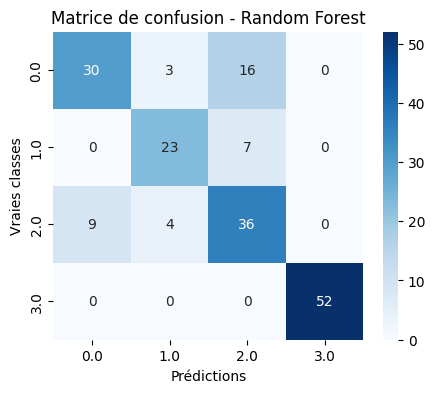

Random Forest - Accuracy: 0.7833 - F1 Score: 0.7838 - Temps d'exécution: 0.4060 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


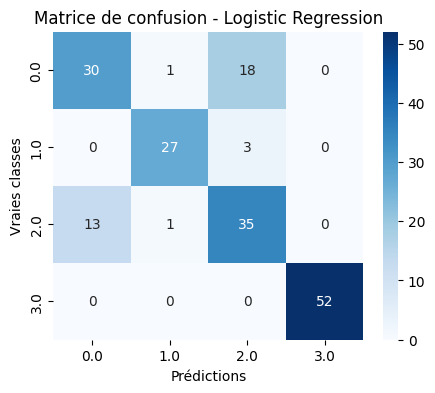

Logistic Regression - Accuracy: 0.8000 - F1 Score: 0.8004 - Temps d'exécution: 0.2829 sec
###################################################################

 Évaluation de SVC avec train_test_split...


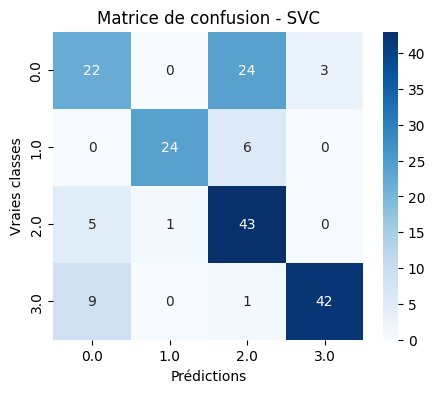

SVC - Accuracy: 0.7278 - F1 Score: 0.7269 - Temps d'exécution: 0.0297 sec
###################################################################

 Évaluation de KNN avec train_test_split...


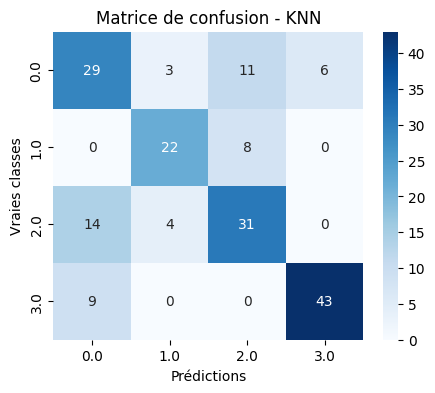

KNN - Accuracy: 0.6944 - F1 Score: 0.6971 - Temps d'exécution: 0.0208 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


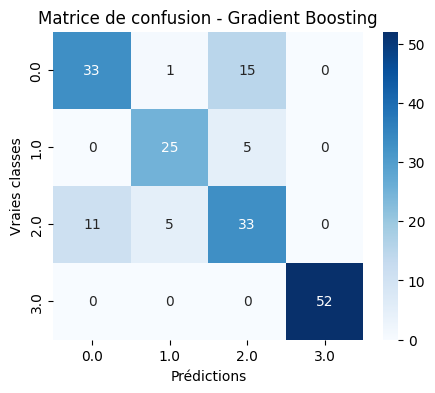

Gradient Boosting - Accuracy: 0.7944 - F1 Score: 0.7948 - Temps d'exécution: 2.6572 sec
###################################################################


In [13]:
print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries*************************************************")
X = Text_combined_tou.drop(columns=["clusters"])
y = Text_combined_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [90]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8562 - F1 Score: 0.8561 - Temps d'exécution: 3.4268 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8769 - Temps d'exécution: 0.3620 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8651 - F1 Score: 0.8656 - Temps d'exécution: 0.3903 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8630 - F1 Score: 0.8628 - Temps d'exécution: 0.0652 sec
####################################

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


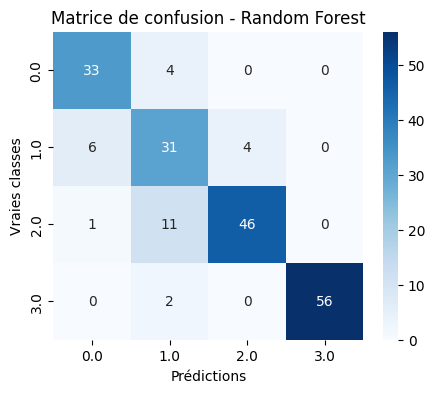

Random Forest - Accuracy: 0.8557 - F1 Score: 0.8591 - Temps d'exécution: 0.3822 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


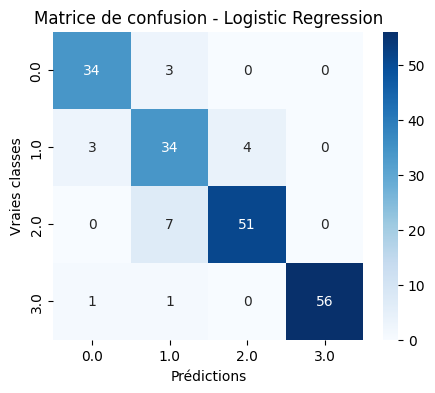

Logistic Regression - Accuracy: 0.9021 - F1 Score: 0.9036 - Temps d'exécution: 0.3167 sec
###################################################################

 Évaluation de SVC avec train_test_split...


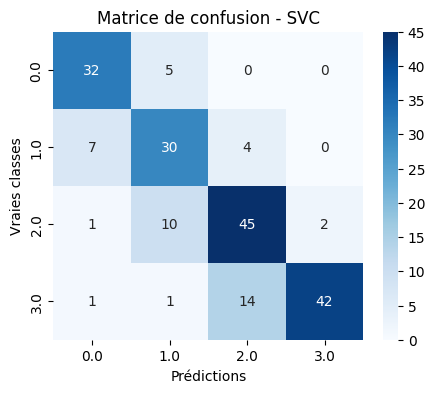

SVC - Accuracy: 0.7680 - F1 Score: 0.7708 - Temps d'exécution: 0.0331 sec
###################################################################

 Évaluation de KNN avec train_test_split...


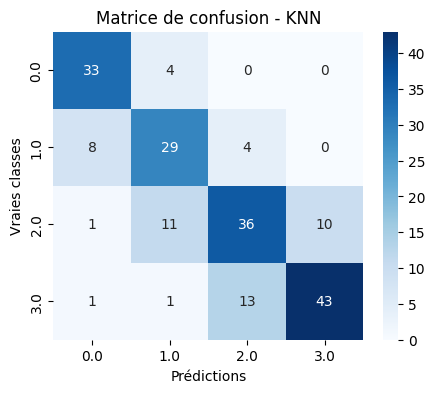

KNN - Accuracy: 0.7268 - F1 Score: 0.7254 - Temps d'exécution: 0.0315 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


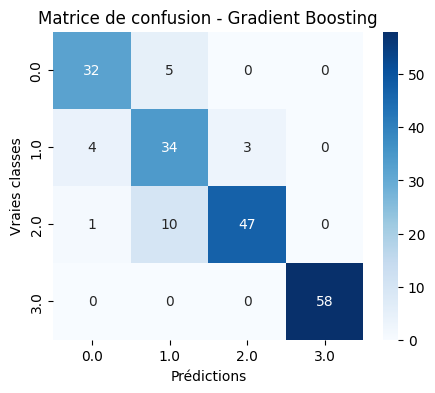

Gradient Boosting - Accuracy: 0.8814 - F1 Score: 0.8838 - Temps d'exécution: 2.7750 sec
###################################################################


In [91]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT  à zurich et ses périphéries*************************************************")
X = Text_combined_zur.drop(columns=["clusters"])
y = Text_combined_zur["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [92]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à zurich et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8938 - F1 Score: 0.8941 - Temps d'exécution: 3.2045 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9103 - F1 Score: 0.9106 - Temps d'exécution: 0.3734 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9000 - F1 Score: 0.9005 - Temps d'exécution: 0.3010 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8904 - F1 Score: 0.8910 - Temps d'exécution: 0.0625 sec
######################################

*************************************************Prédiction de la  consommation de  climatisation en fonction de TEXT  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


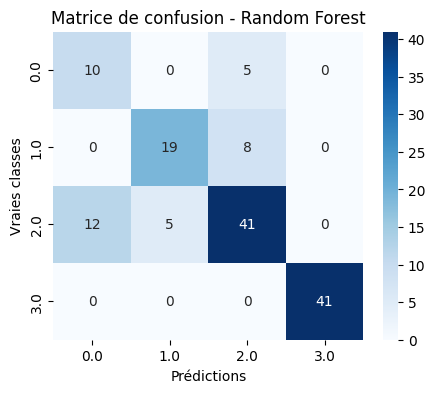

Random Forest - Accuracy: 0.7872 - F1 Score: 0.7921 - Temps d'exécution: 0.7770 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


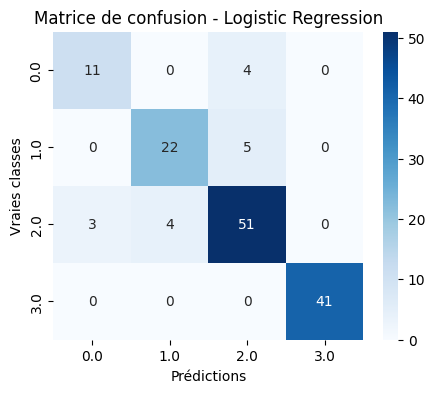

Logistic Regression - Accuracy: 0.8865 - F1 Score: 0.8860 - Temps d'exécution: 0.5393 sec
###################################################################

 Évaluation de SVC avec train_test_split...


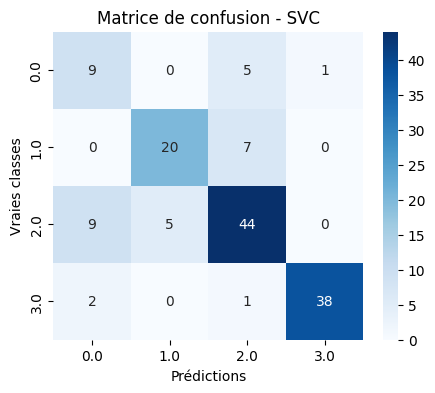

SVC - Accuracy: 0.7872 - F1 Score: 0.7930 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de KNN avec train_test_split...


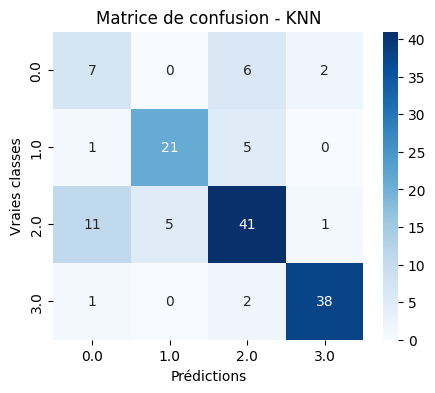

KNN - Accuracy: 0.7589 - F1 Score: 0.7650 - Temps d'exécution: 0.0224 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


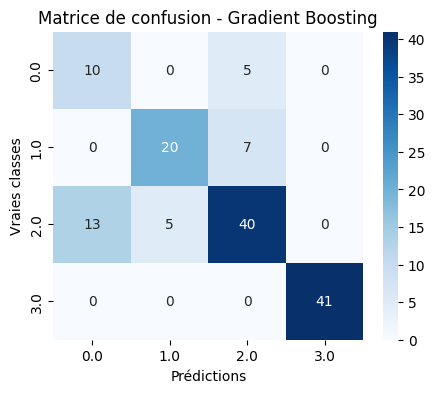

Gradient Boosting - Accuracy: 0.7872 - F1 Score: 0.7932 - Temps d'exécution: 2.4305 sec
###################################################################


In [93]:
print("*************************************************Prédiction de la  consommation de  climatisation en fonction de TEXT  à zurich et ses périphéries*************************************************")
X = Text_combined_sev.drop(columns=["clusters"])
y = Text_combined_sev["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [94]:
print("*************************************************Prédiction de la  consommation de climatisation en fonction de TEXT à zurich et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de climatisation en fonction de TEXT à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9062 - F1 Score: 0.9061 - Temps d'exécution: 3.4488 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9253 - F1 Score: 0.9252 - Temps d'exécution: 0.4985 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9062 - F1 Score: 0.9065 - Temps d'exécution: 0.2698 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8986 - F1 Score: 0.8988 - Temps d'exécution: 0.0783 sec
##################################

**************************************Prédiction de la  consommation de  chauffage en fonction de TEXT et occupation à toulouse et ses périphéries************************************

 Évaluation de Random Forest avec train_test_split...


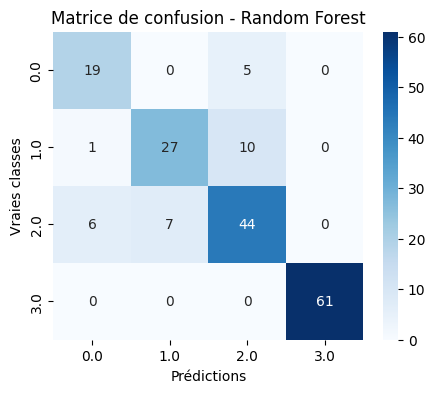

Random Forest - Accuracy: 0.8389 - F1 Score: 0.8388 - Temps d'exécution: 0.4163 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


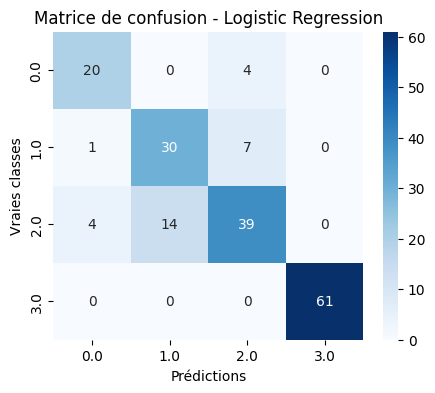

Logistic Regression - Accuracy: 0.8333 - F1 Score: 0.8330 - Temps d'exécution: 0.5673 sec
###################################################################

 Évaluation de SVC avec train_test_split...


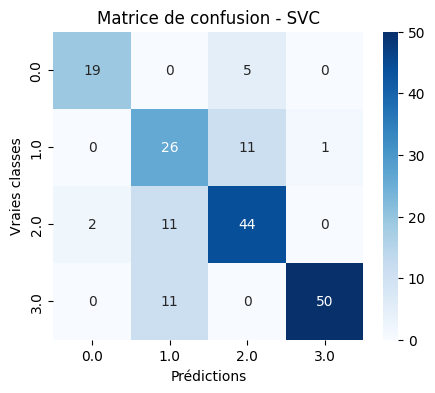

SVC - Accuracy: 0.7722 - F1 Score: 0.7810 - Temps d'exécution: 0.0393 sec
###################################################################

 Évaluation de KNN avec train_test_split...


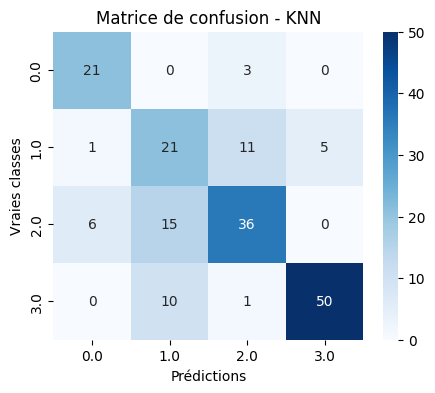

KNN - Accuracy: 0.7111 - F1 Score: 0.7165 - Temps d'exécution: 0.0289 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


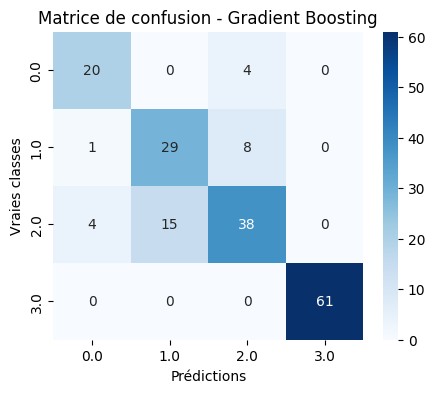

Gradient Boosting - Accuracy: 0.8222 - F1 Score: 0.8220 - Temps d'exécution: 2.7780 sec
###################################################################


In [123]:
print("**************************************Prédiction de la  consommation de  chauffage en fonction de TEXT et occupation à toulouse et ses périphéries************************************")
X = Text_occ_combined_tou.drop(columns=["clusters"])
y = Text_occ_combined_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [124]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8651 - F1 Score: 0.8651 - Temps d'exécution: 3.4080 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8836 - F1 Score: 0.8836 - Temps d'exécution: 0.5809 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8664 - F1 Score: 0.8672 - Temps d'exécution: 0.3971 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8493 - F1 Score: 0.8494 - Temps d'exécution: 0.0987 sec
######################

*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT et humidite à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


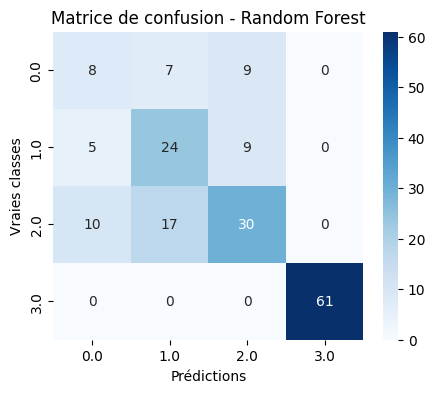

Random Forest - Accuracy: 0.6833 - F1 Score: 0.6831 - Temps d'exécution: 0.3407 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


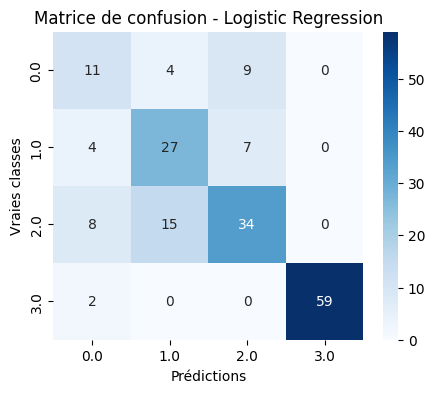

Logistic Regression - Accuracy: 0.7278 - F1 Score: 0.7301 - Temps d'exécution: 0.4271 sec
###################################################################

 Évaluation de SVC avec train_test_split...


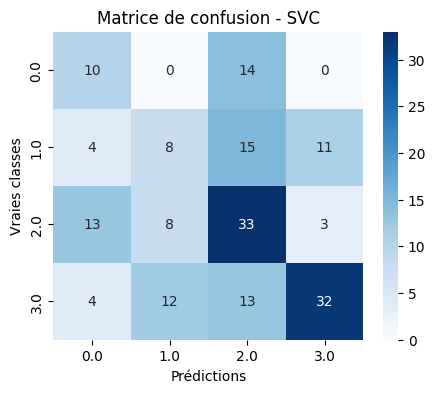

SVC - Accuracy: 0.4611 - F1 Score: 0.4607 - Temps d'exécution: 0.0533 sec
###################################################################

 Évaluation de KNN avec train_test_split...


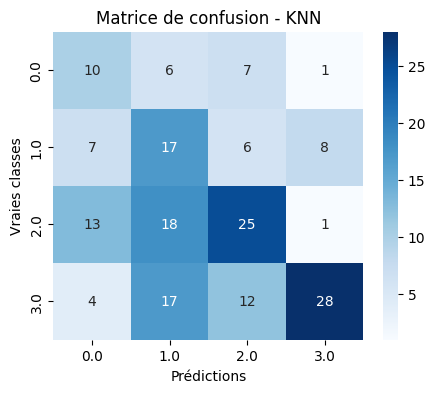

KNN - Accuracy: 0.4444 - F1 Score: 0.4604 - Temps d'exécution: 0.0145 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


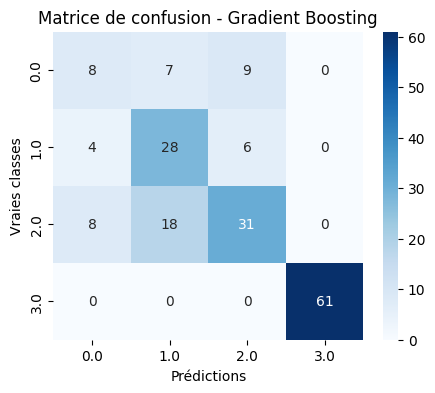

Gradient Boosting - Accuracy: 0.7111 - F1 Score: 0.7079 - Temps d'exécution: 1.6742 sec
###################################################################


In [126]:
print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT et humidite à Toulouse et ses périphéries*************************************************")
X = Hum_combined_tou.drop(columns=["clusters"])
y = Hum_combined_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [127]:
print("*************************************************Prédiction de la  consommation de chauffagr  en fonction de TEXT et humidite à toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffagr  en fonction de TEXT et humidite à toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7979 - F1 Score: 0.7971 - Temps d'exécution: 2.9711 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8116 - F1 Score: 0.8110 - Temps d'exécution: 0.3909 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8096 - F1 Score: 0.8072 - Temps d'exécution: 0.4889 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7808 - F1 Score: 0.7807 - Temps d'exécution: 0.0660 sec
#######################